## Pendahuluan:

Setelah selesai melakukan Analisis Data Eksploratif menggunakan SQL, selanjutnya akan melakukannya dengan menggunakan python dan mencari hipotesis durasi perjalanan dari Loop menuju Bandara.

### Tujuan dan Tahapan:

Tujuan dari pengolahan data kali ini adalah:
1. Menemukan 10 wilayah teratas untuk pengantaran.
2. Menemukan perusahaan taksi dengan jumlah perjalanan terbanyak.
3. Menguji hipotesis untuk rata-rata perjalanan di wilayah teramai ketika cuaca hujan dan cerah. 

## Pra-pemrosesan

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Melakukan import pada library yang dibutuhkan dalam pengolahan data.

## Memuat Data

In [15]:
df_company = pd.read_csv('/datasets/project_sql_result_01.csv')
df_location = pd.read_csv('/datasets/project_sql_result_04.csv')
df_weather = pd.read_csv('/datasets/project_sql_result_07.csv')

Terdapat tiga buah dataframe yang akan digunakan untuk analisis data eksploratif dan pengujian hipotesis yaitu tabel perusahaan, tabel lokasi drop off, dan tabel cuaca. Ketiga dataframe tersebut akan diobservasi kembali untuk melihat isi datanya apakah sudah sesuai apa belum.

## Mengeksplorasi Data Awal Untuk Mendapatkan Informasi Umum

### Mengeksplorasi Data Pada Tabel Company

Dalam tabel company, berisi kolom-kolom berikut:

- `company_name`
- `trips_amount`

In [16]:
df_company.shape

(64, 2)

In [17]:
df_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [18]:
df_company.nunique()

company_name    64
trips_amount    56
dtype: int64

In [19]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Dari hasil pengamatan terhadap tabel company tidak ditemukan adanya type dayta yang salah dan data yang null.

### Mengeksplorasi Data Pada Tabel Location

Dalam tabel location, berisi kolom-kolom berikut:

- `dropoff_location_name`
- `average_trips`

In [20]:
df_location.shape

(94, 2)

In [21]:
df_location.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [22]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Dari hasil pengamatan terhadap tabel lokasi drop off tidak ditemukan adanya type dayta yang salah dan data yang null.

### Mengeksplorasi Data Pada Tabel Weather

Dalam tabel weather, berisi kolom-kolom berikut:

- `start_ts`
- `weather_condition`
- `duration_seconds`

In [23]:
df_weather.shape

(1068, 3)

In [24]:
df_weather.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [25]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Terdapat kesalahan pada tipe data di kolom start_ts, yang seharusnya tipe datanya adalah datetime tetapi yang tertera adalah object. Untuk itu akan diubah tipe data menjadi datetime.

In [26]:
df_weather['start_ts'] = pd.to_datetime(df_weather['start_ts'])

In [27]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


## Analisis Data Eksploratif

### Mengidentifikasi 10 Wilayah Teratas Yang Dijadikan Sebagai Titik Pengantaran

In [52]:
df_avg_trip = df_location.sort_values(['average_trips'], ascending = False).head(10)
df_avg_trip

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Dari 10 wilayah didapatkan wilayah Loop menjadi yang paling atas sebagai titik pengantaran, sedangakan Sheffield & DePaul beada di urutan terbawah dari list tersebut.

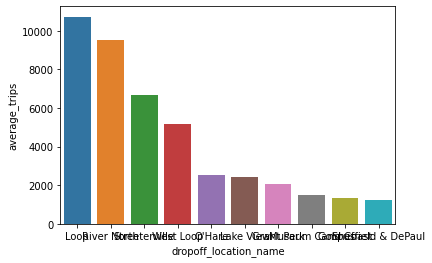

In [49]:
sns.barplot(data=df_avg_trip, x='dropoff_location_name', y='average_trips')
plt.show()

Dari grafik tujuan pengantaran, kita mendapatkan wilayah Loop sebagai yang teratas, diikuti oleh River North, Streeterville, dan West Loop secara berurutan. Keempat wilayah ini sangatlah populer dijadikan tempat tujuan pengantaran, terlihat dari diagram batang bahwa keempat wilayah ini memiliki perbedaan yang cukup signifikan dibandingkan dengan wilayah urutan berikutnya (5 sampai 10). Dimana jika kita mengambil Lake View, wilayah dengan peringkat ke 5, hanya memiliki rata-rata setengahnya dari wilayah di urutan ke 4 yaitu West Loop, ini menandakan bahwa menjadikan 4 wilayah tersebut sebagai tujuan pengantaran sangat berpotensi untuk kedepannya.

### Perusahaan Taksi dan Jumlah Perjalanannya

In [51]:
df_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


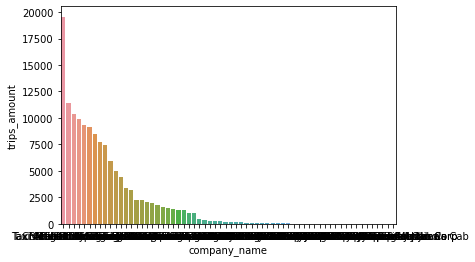

In [50]:
sns.barplot(data=df_company, x='company_name', y='trips_amount')
plt.show()

Dari diagram batang yang didapat, perusahaan Flash Cab adalah perusahaan taksi dengan jumlah perjalanan terbanyak, diikuti oleh Taxi Affiliation Services dan Medallion Leasing. Jumlah trip dari Flash Cab juga hampir sebanyak dua kali total trip dari Taxi Affiliation Services maupun Medallion Leasing. Kemungkinan Flash Cab adalah perusahaan taksi yang memiliki daerah pengantaran ke wilayah Loop, River North, Streeterville, atau West Loop yang paling banyak sehingga mereka bisa menjadi yang teratas dari jumlah trips jika dibandingkan dengan perusahaan taksi lainnya.

## Menguji Hipotesis

Hipotesis yang diuji berada pada kondisi dimana hari adalah Sabtu dan kondisi cuaca hujan. Untuk itu kita harus memastikan bahwa tanggal pada kolom start_ts menunjukkan hari sabtu dan memisahkan data antara Good atau Bad.

In [31]:
df_weather['day_trip'] = df_weather['start_ts'].dt.strftime('%A')

In [32]:
df_weather

,start_ts,weather_conditions,duration_seconds,day_trip
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,Saturday
1065,2017-11-11 13:00:00,Good,2100.0,Saturday
1066,2017-11-11 08:00:00,Good,1380.0,Saturday


In [33]:
df_weather['day_trip'].unique()

array(['Saturday'], dtype=object)

Kolom day_trip hanya memiliki satu nilai unik yaitu saturday dimana ini berarti keseluruhan data ada kolom memang terjadi di hari Sabtu.

In [34]:
df_weather['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

Kolom weather_conditions hanya berisi dua nilai unik, yaitu Good dan Bad. Untuk itu kita akan memisahkan kedua variabel tersebut.

In [35]:
df_rain = df_weather[df_weather['weather_conditions'] == 'Bad'].reset_index(drop=True)
df_rain

,start_ts,weather_conditions,duration_seconds,day_trip
0,2017-11-04 16:00:00,Bad,2969.0,Saturday
1,2017-11-18 12:00:00,Bad,1980.0,Saturday
2,2017-11-04 17:00:00,Bad,2460.0,Saturday
3,2017-11-04 16:00:00,Bad,2760.0,Saturday
4,2017-11-18 12:00:00,Bad,2460.0,Saturday
...,...,...,...,...
175,2017-11-18 12:00:00,Bad,2560.0,Saturday
176,2017-11-18 10:00:00,Bad,1908.0,Saturday
177,2017-11-18 12:00:00,Bad,2400.0,Saturday
178,2017-11-18 16:00:00,Bad,2186.0,Saturday


In [36]:
df_clear = df_weather[df_weather['weather_conditions'] == 'Good'].reset_index(drop=True)
df_clear

,start_ts,weather_conditions,duration_seconds,day_trip
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday
...,...,...,...,...
883,2017-11-11 06:00:00,Good,1500.0,Saturday
884,2017-11-25 11:00:00,Good,0.0,Saturday
885,2017-11-11 10:00:00,Good,1318.0,Saturday
886,2017-11-11 13:00:00,Good,2100.0,Saturday


- H0 = Rata-rata durasi perjalanan pada Sabtu dengan kondisi hujan dan cerah adalah SAMA
- H1 = Rata-rata durasi perjalanan pada Sabtu dengan kondisi hujan dan cerah adalah TIDAK SAMA

Kedua hipotesis menggunakan alpha = 0.05, agar tingkat kepercayaan dari pengujian hipotesis sebesar 95% (100 *(1-alpha) %).

In [37]:
np.var(df_rain['duration_seconds']), np.var(df_clear['duration_seconds'])

(517403.56330246915, 575732.9308497686)

In [38]:
df_rain['duration_seconds'].describe(), df_clear['duration_seconds'].describe()

(count     180.000000
 mean     2427.205556
 std       721.314138
 min       480.000000
 25%      1962.000000
 50%      2540.000000
 75%      2928.000000
 max      4980.000000
 Name: duration_seconds, dtype: float64,
 count     888.000000
 mean     1999.675676
 std       759.198268
 min         0.000000
 25%      1389.750000
 50%      1800.000000
 75%      2460.000000
 max      7440.000000
 Name: duration_seconds, dtype: float64)

Rata-rata yang didapat dengan menggunakan metode describe terlihat cukup berbeda jauh dimana durasi rata-rata ketika cuaca hujan 2427.205556 dan ketika cuaca cerah 1999.675676.

In [39]:
(np.var(df_clear['duration_seconds']) - np.var(df_rain['duration_seconds'])) / np.var(df_rain['duration_seconds'])

0.11273476196220286

In [40]:
alpha = 0.05

results = st.ttest_ind(df_clear['duration_seconds'], df_rain['duration_seconds'], equal_var = True)

print('p-value= ', results.pvalue)

if results.pvalue < alpha:
    print('Kita menolak hipotesis nol')
else:
    print('Kita menerima hipotesis nol')

p-value=  6.517970327099473e-12
Kita menolak hipotesis nol


Dengan menggunakan T-test independent (Levene's Method), didapatkan p-value sebesar 6.517970327099473e-12, dengan kata lain p-value < alpha. Mengacu dengan hasil itu kita menolak Hipotesis Null dimana rata-rata durasi perjalanan pada Sabtu dengan kondisi hujan dan cerah sama.

## Kesimpulan

Dari hasil pengolahan data, didapatkan kesimpulan:
- Wilayah Loop mendaji wilayah teratas untuk tujuan pengantaran, diikuti oleh River North, Streeterville, dan West Loop secara berurutan.
- Flash Cab menjadi perusahaan taksi dengan jumlah pengantaran terbanyak dibandingkan dengan taksi lainnya. Flash Cab memiliki total perjalanan hampir dua kali lebih banyak daripada perusahaan taksi yang berada di peringkat kedua yaitu Taxi Affiliation Services. Kemungkinan Flash Cab menjadi perusahaan taksi yang memiliki banyak tujuan pengantaran di 4 wilayah teratas yaitu Loop, River North, Streeterville, dan West Loop
- Hasil hipotesis untuk rata-rata durasi perjalanan ketika hujan dengan cerah adalah tidak sama, karena kita bisa melihat adanya perbedaan rata-rata durasi perjalanan yang cukup signifikan dan hasil dari t-test menunjukkan nilai p value sebesar 6.517970327099473e-12